In [1]:
#GENRATING DRAGONS

import random
from random import randint
#print(randint(0, 9)) results in a number from [0,9]

#DRAGON SECTS
#https://pathfinderwiki.com/wiki/Dragon#Draconic_septs
#metalic dragons=Good brass, copper, bronze, silver, and gold
#chromatic dragons=Evil "white", "black", "green", "blue", "red" 
#Primal dragons=Chaotic brine, cloud, crystal, magma, and umbral
#Outer dragons=Lawful lunar, solar, time, void, vortex

#good
metallic_dragons=["brass", "copper", "bronze", "silver", "gold"]

#evil
chromatic_dragons=["white", "black", "green", "blue", "red"]

#chaotic
primal_dragons=["brine", "cloud", "crystal", "magma", "umbral"]

#lawful
outer_dragons=["lunar", "solar", "time", "void", "vortex"]


#dragons_sects[type][subtype]
dragon_sects =[metallic_dragons,chromatic_dragons,primal_dragons,outer_dragons]

#ALIGNMENTS
law_chaos=["lawful","lawful","neutral","chaotic","chaotic"]
good_evil=["good","good","neutral","evil","evil"]





#return dragon as a string    
def generateDragon():    

    sect_nr=randint(0,len(dragon_sects)-1)
    
    subsect_nr=randint(0,len(dragon_sects[sect_nr])-1)
    
    lawfulness_nr=randint(0,len(law_chaos)-1)   
    
    morality_nr=randint(0,len(good_evil)-1)
    
    return law_chaos[lawfulness_nr]+" "+good_evil[morality_nr]+" "+dragon_sects[sect_nr][subsect_nr]+" dragon"



#returns 0 if dragon alignment is incorrect, 1 if correct 
def generateCorectness(dragonstring):
    
    splitdragon=dragonstring.split()
    
    #print(dragon)
    
    #chaotic evil brass dragon
    if splitdragon[1] == "evil" and splitdragon[2] in metallic_dragons:
        #print(0)
        return 0  
    
    elif splitdragon[1] == "good" and splitdragon[2] in chromatic_dragons:
        #print(0)
        return 0  
    
    elif splitdragon[0] == "lawful" and splitdragon[2] in primal_dragons:
        #print(0)
        return 0 
    
    elif splitdragon[0] == "chaotic" and splitdragon[2] in outer_dragons:
        #print(0)
        return 0 
    
    else:
        #print(1)
        return 1

   
    


#FUNCTION TO ACTUALLY GENERATE AN ARRAY OF DRAGONS
def generateArrays(size):
    
    generated_dragons=[]
    correctness=[]

    for i in range(size):    

        tempdragon=generateDragon()

        tempcorrect=generateCorectness(tempdragon)

        #print(mydragon,tempcorrect)

        generated_dragons+=[tempdragon]
        correctness+=[tempcorrect]
    return generated_dragons, correctness

        
#GENERATE A TEST SET
#testing_data=[]
#testing_correctness=[]


#generateArrays(100000,test_data,test_correctness)       
    
#for i in range(len(train_data)):
    #print(train_data[i],train_correctness[i])
print("DONE")


DONE


lawful evil cloud dragon 0
neutral neutral vortex dragon 1
chaotic good bronze dragon 1
chaotic good solar dragon 0
neutral good void dragon 1
chaotic good lunar dragon 0
chaotic good crystal dragon 1
chaotic good cloud dragon 1
chaotic evil vortex dragon 0
chaotic neutral solar dragon 0
neutral neutral umbral dragon 1
neutral neutral crystal dragon 1
lawful evil void dragon 1
lawful neutral silver dragon 1
lawful neutral copper dragon 1
lawful good vortex dragon 1
lawful evil magma dragon 0
neutral evil vortex dragon 1
lawful neutral void dragon 1
chaotic neutral blue dragon 1
chaotic evil silver dragon 0
lawful good bronze dragon 1
lawful evil vortex dragon 1
neutral good red dragon 0
lawful good umbral dragon 0
lawful good umbral dragon 0
neutral good brine dragon 1
chaotic neutral green dragon 1
chaotic evil umbral dragon 1
chaotic good white dragon 0
neutral good black dragon 0
chaotic good white dragon 0
neutral evil copper dragon 0
neutral neutral time dragon 1
chaotic neutral c

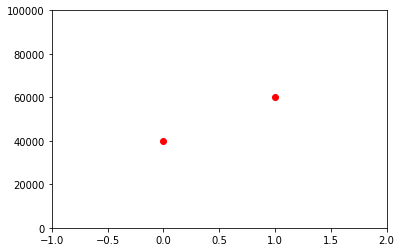

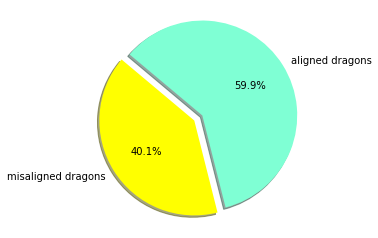

DONE


In [3]:
#GENERATE DATA SETS
import matplotlib.pyplot as plt

train_size=100000
train_data=[]
train_correctness=[]

test_size=100
test_data=[]
test_correctness=[]



train_data,train_correctness = generateArrays(train_size)
test_data,test_correctness = generateArrays(test_size)

#for t in range(train_size):
    #print(train_data[t],train_correctness[t])
#print("DONE")

for t in range(test_size):
    print(test_data[t],test_correctness[t])

print(train_correctness.count(0),train_correctness.count(1))
plt.plot([train_correctness.count(0),train_correctness.count(1)],'ro')
plt.axis([-1,2,0,train_size])
plt.show()


labels = "misaligned dragons","aligned dragons"
sizes = train_correctness.count(0),train_correctness.count(1)
colors = 'yellow','aquamarine'
explode=(0.1,0)
plt.pie(sizes,explode=explode, labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


print("DONE")

    

In [4]:
#IMPORTING STUFF
import tensorflow as ts
import keras as ks
import numpy as np


from keras.layers.core import Dense, Activation
from keras.optimizers import SGD,RMSprop,Adam 
from keras.models import Sequential
from keras.utils import np_utils
print("DONE")

DONE


Using TensorFlow backend.


In [12]:
#MAGIC NUMBERS
nr_neurons_in_first_layer=1000
nr_neurons_in_second_layer=100
nr_neurons_in_third_layer=10

nr_classes=2
optimizer=Adam()
my_batch_size=100
my_epochs=500
print("done")

done


In [6]:
#FITTIN DATA
#tokenizing strings
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tk = Tokenizer()
tk.fit_on_texts(train_data)
index_list = tk.texts_to_sequences(train_data)
train_data = pad_sequences(index_list)#x_train = pad_sequences(index_list, maxlen=maxlen)

tk.fit_on_texts(test_data)
index_list = tk.texts_to_sequences(test_data)
test_data = pad_sequences(index_list)#x_train = pad_sequences(index_list, maxlen=maxlen)


#one hot encoding
train_correctness=np_utils.to_categorical(train_correctness, nr_classes)

test_correctness=np_utils.to_categorical(test_correctness, nr_classes)



print(train_data)
print(test_correctness)
print("done")

[[ 5  6 14  1]
 [ 5  6 11  1]
 [ 5  6 24  1]
 ...
 [ 4  2 13  1]
 [ 4  2  9  1]
 [ 5  3 26  1]]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
don

In [7]:
#BULIDING A MODEL
model=Sequential()
model.add(Dense(nr_neurons_in_first_layer, input_shape=(4,), activation='relu' ))
model.add(Dense(nr_neurons_in_second_layer, activation='relu'))
model.add(Dense(nr_neurons_in_third_layer, activation='relu'))
model.add(Dense(nr_classes, activation='softmax' ))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              5000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 106,132
Trainable params: 106,132
Non-trainable params: 0
_________________________________________________________________


In [8]:
#COMPILING MODEL
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print("done")

done


In [13]:
#history = model.fit(x_train, y_train_onehot, batch_size=b_size, epochs=epoch, verbose=1, validation_split=0.2)

history= model.fit(train_data,train_correctness, batch_size=my_batch_size, epochs=my_epochs, verbose=2, validation_split=0.2)
print("done")

Train on 80000 samples, validate on 20000 samples
Epoch 1/500
 - 2s - loss: 0.2715 - acc: 0.9833 - val_loss: 0.2508 - val_acc: 0.9847
Epoch 2/500
 - 2s - loss: 0.2711 - acc: 0.9833 - val_loss: 0.2485 - val_acc: 0.9847
Epoch 3/500
 - 2s - loss: 0.2706 - acc: 0.9833 - val_loss: 0.2481 - val_acc: 0.9847
Epoch 4/500
 - 2s - loss: 0.3481 - acc: 0.9737 - val_loss: 0.3275 - val_acc: 0.9800
Epoch 5/500
 - 2s - loss: 0.3365 - acc: 0.9794 - val_loss: 0.3264 - val_acc: 0.9800
Epoch 6/500
 - 2s - loss: 0.3355 - acc: 0.9794 - val_loss: 0.3256 - val_acc: 0.9800
Epoch 7/500
 - 2s - loss: 0.3347 - acc: 0.9794 - val_loss: 0.3248 - val_acc: 0.9800
Epoch 8/500
 - 2s - loss: 0.3341 - acc: 0.9794 - val_loss: 0.3243 - val_acc: 0.9800
Epoch 9/500
 - 2s - loss: 0.3338 - acc: 0.9794 - val_loss: 0.3240 - val_acc: 0.9800
Epoch 10/500
 - 2s - loss: 0.3335 - acc: 0.9794 - val_loss: 0.3238 - val_acc: 0.9800
Epoch 11/500
 - 2s - loss: 0.3333 - acc: 0.9794 - val_loss: 0.3236 - val_acc: 0.9800
Epoch 12/500
 - 2s - los

Epoch 96/500
 - 2s - loss: 0.0388 - acc: 0.9932 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 97/500
 - 2s - loss: 8.2947e-04 - acc: 1.0000 - val_loss: 5.0130e-04 - val_acc: 1.0000
Epoch 98/500
 - 2s - loss: 3.6954e-04 - acc: 1.0000 - val_loss: 2.8422e-04 - val_acc: 1.0000
Epoch 99/500
 - 2s - loss: 2.4728e-04 - acc: 1.0000 - val_loss: 2.0088e-04 - val_acc: 1.0000
Epoch 100/500
 - 2s - loss: 1.8872e-04 - acc: 1.0000 - val_loss: 1.6456e-04 - val_acc: 1.0000
Epoch 101/500
 - 2s - loss: 1.5143e-04 - acc: 1.0000 - val_loss: 2.0018e-04 - val_acc: 1.0000
Epoch 102/500
 - 2s - loss: 1.2683e-04 - acc: 1.0000 - val_loss: 1.1817e-04 - val_acc: 1.0000
Epoch 103/500
 - 2s - loss: 1.0327e-04 - acc: 1.0000 - val_loss: 9.2184e-05 - val_acc: 1.0000
Epoch 104/500
 - 2s - loss: 8.1829e-05 - acc: 1.0000 - val_loss: 6.6425e-05 - val_acc: 1.0000
Epoch 105/500
 - 2s - loss: 6.3552e-05 - acc: 1.0000 - val_loss: 4.9627e-05 - val_acc: 1.0000
Epoch 106/500
 - 2s - loss: 4.5333e-05 - acc: 1.0000 - val_loss: 1.7014e

Epoch 191/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2926 - val_acc: 0.9819
Epoch 192/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 193/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 194/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 195/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 196/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 197/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 198/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 199/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 200/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 201/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 202/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val

Epoch 287/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 288/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 289/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 290/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 291/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 292/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 293/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 294/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 295/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 296/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 297/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 298/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val

Epoch 383/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 384/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 385/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 386/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 387/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 388/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 389/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 390/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 391/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 392/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 393/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 394/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val

Epoch 479/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 480/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 481/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 482/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 483/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 484/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 485/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 486/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 487/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 488/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 489/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val_loss: 0.2925 - val_acc: 0.9819
Epoch 490/500
 - 2s - loss: 0.2627 - acc: 0.9837 - val

In [14]:
score = model.evaluate(test_data,test_correctness)
print("done")

100/100 [==============================] - 0s 120us/step
done


In [15]:
print("score: ",score[0])
print("accuracy: ",score[1])

score:  2.578895263671875
accuracy:  0.84
